In [2]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression

In [3]:
# read  data
survey = pd.read_csv('Data/survey.csv')
indicators = pd.read_csv('Data/raw_data/Development_Indicators.csv')

# Data Cleaning and Pre-Processing

In [4]:
# select the required field from clean the indicators dataset
indicator_filter = indicators[(indicators['Series Name'] == "Coverage of social insurance programs (% of population)")|(indicators['Series Name'] == "Coverage of social protection and labor programs (% of population)")|(indicators['Series Name'] == "Coverage of unemployment benefits and ALMP (% of population)")|(indicators['Series Name'] == "Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)")|(indicators['Series Name'] == "Employment to population ratio, 15+, female (%) (national estimate)")|(indicators['Series Name'] == "Employment to population ratio, 15+, male (%) (national estimate)")|(indicators['Series Name'] == "GDP per capita (current US$)")|(indicators['Series Name'] == "Labor force participation rate, female (% of female population ages 15+) (national estimate)")|(indicators['Series Name'] == "Labor force participation rate, male (% of male population ages 15+) (national estimate)")|(indicators['Series Name'] == "Labor force participation rate, total (% of total population ages 15+) (national estimate)")|(indicators['Series Name'] == "Labor force with basic education (% of total working-age population with basic education)")|(indicators['Series Name'] == "Labor force with basic education, female (% of female working-age population with basic education)")|(indicators['Series Name'] == "Life expectancy at birth, female (years)")|(indicators['Series Name'] == "Life expectancy at birth, total (years)")|(indicators['Series Name'] == "Population, total")|(indicators['Series Name'] == "Suicide mortality rate (per 100,000 population)")|(indicators['Series Name'] == "Suicide mortality rate, female (per 100,000 female population)")|(indicators['Series Name'] == "Suicide mortality rate, male (per 100,000 male population)")|(indicators['Series Name'] == "Unemployment with basic education (% of total labor force with basic education)")|(indicators['Series Name'] == "Unemployment with basic education, female (% of female labor force with basic education)")|(indicators['Series Name'] == "Unemployment with basic education, male (% of male labor force with basic education)")]
# rename year column
rename_df=indicator_filter.rename(columns = {"1960 [YR1960]":"1960","1961 [YR1961]":"1961","1962 [YR1962]":"1962","1963 [YR1963]":"1963","1964 [YR1964]":"1964","1965 [YR1965]":"1965","1966 [YR1966]":"1966","1967 [YR1967]":"1967","1968 [YR1968]":"1968","1969 [YR1969]":"1969","1970 [YR1970]":"1970",
                                             "1971 [YR1971]":"1971","1972 [YR1972]":"1972","1973 [YR1973]":"1973","1974 [YR1974]":"1974","1975 [YR1975]":"1975","1976 [YR1976]":"1976","1977 [YR1977]":"1977","1978 [YR1978]":"1978","1979 [YR1979]":"1979","1980 [YR1980]":"1980","1981 [YR1981]":"1981",
                                             "1982 [YR1982]":"1982","1983 [YR1983]":"1983","1984 [YR1984]":"1984","1985 [YR1985]":"1985","1986 [YR1986]":"1986","1987 [YR1987]":"1987","1988 [YR1988]":"1988","1989 [YR1989]":"1989","1990 [YR1990]":"1990","1991 [YR1991]":"1991","1992 [YR1992]":"1992",
                                             "1993 [YR1993]":"1993","1994 [YR1994]":"1994","1995 [YR1995]":"1995","1996 [YR1996]":"1996","1997 [YR1997]":"1997","1998 [YR1998]":"1998","1999 [YR1999]":"1999","2000 [YR2000]":"2000","2001 [YR2001]":"2001","2002 [YR2002]":"2002","2003 [YR2003]":"2003",
                                             "2004 [YR2004]":"2004","2005 [YR2005]":"2005","2006 [YR2006]":"2006","2007 [YR2007]":"2007","2008 [YR2008]":"2008","2009 [YR2009]":"2009","2010 [YR2010]":"2010","2011 [YR2011]":"2011","2012 [YR2012]":"2012","2013 [YR2013]":"2013","2014 [YR2014]":"2014",
                                             "2015 [YR2015]":"2015","2016 [YR2016]":"2016","2017 [YR2017]":"2017","2018 [YR2018]":"2018","2019 [YR2019]":"2019","2020 [YR2020]":"2020",}) 

rename_df.head()

,Country Name,Country Code,Series Name,Series Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
8,Afghanistan,AFG,Coverage of social insurance programs (% of po...,per_si_allsi.cov_pop_tot,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,AFG,Coverage of social protection and labor progra...,per_allsp.cov_pop_tot,NaN,NaN,NaN,NaN,NaN,NaN,...,8.820582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Afghanistan,AFG,Coverage of unemployment benefits and ALMP (% ...,per_lm_alllm.cov_pop_tot,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Afghanistan,AFG,"Employment to population ratio, 15+, female (%...",SL.EMP.TOTL.SP.FE.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,15.481100,NaN,23.177000,NaN,NaN,18.201599,NaN,NaN,NaN
15,Afghanistan,AFG,"Employment to population ratio, 15+, male (%) ...",SL.EMP.TOTL.SP.MA.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,75.998901,NaN,71.530197,NaN,NaN,65.576797,NaN,NaN,NaN


In [5]:
# Drop column we don't need 
dropeddata=rename_df.drop("Series Code",axis=1)
transposed = dropeddata.pivot_table(index=['Country Name','Country Code'], columns=['Series Name'], aggfunc='first', fill_value=0)
reset_1960=transposed["1960"].reset_index()
reset_1961=transposed["1961"].reset_index()
reset_1962=transposed["1962"].reset_index()
reset_1963=transposed["1963"].reset_index()
reset_1964=transposed["1964"].reset_index()
reset_1965=transposed["1965"].reset_index()
reset_1966=transposed["1966"].reset_index()
reset_1967=transposed["1967"].reset_index()
reset_1968=transposed["1968"].reset_index()
reset_1969=transposed["1969"].reset_index()
reset_1970=transposed["1970"].reset_index()
reset_1971=transposed["1971"].reset_index()
reset_1972=transposed["1972"].reset_index()
reset_1973=transposed["1973"].reset_index()
reset_1974=transposed["1974"].reset_index()
reset_1975=transposed["1975"].reset_index()
reset_1976=transposed["1976"].reset_index()
reset_1977=transposed["1977"].reset_index()
reset_1978=transposed["1978"].reset_index()
reset_1979=transposed["1979"].reset_index()
reset_1980=transposed["1980"].reset_index()
reset_1981=transposed["1981"].reset_index()
reset_1982=transposed["1982"].reset_index()
reset_1983=transposed["1983"].reset_index()
reset_1984=transposed["1984"].reset_index()
reset_1985=transposed["1985"].reset_index()
reset_1986=transposed["1986"].reset_index()
reset_1987=transposed["1987"].reset_index()
reset_1988=transposed["1988"].reset_index()
reset_1989=transposed["1989"].reset_index()
reset_1990=transposed["1990"].reset_index()
reset_1991=transposed["1991"].reset_index()
reset_1992=transposed["1992"].reset_index()
reset_1993=transposed["1993"].reset_index()
reset_1994=transposed["1994"].reset_index()
reset_1995=transposed["1995"].reset_index()
reset_1996=transposed["1996"].reset_index()
reset_1997=transposed["1997"].reset_index()
reset_1998=transposed["1998"].reset_index()
reset_1999=transposed["1999"].reset_index()
reset_2000=transposed["2000"].reset_index()
reset_2001=transposed["2001"].reset_index()
reset_2002=transposed["2002"].reset_index()
reset_2003=transposed["2003"].reset_index()
reset_2004=transposed["2004"].reset_index()
reset_2005=transposed["2005"].reset_index()
reset_2006=transposed["2006"].reset_index()
reset_2007=transposed["2007"].reset_index()
reset_2008=transposed["2008"].reset_index()
reset_2009=transposed["2009"].reset_index()
reset_2010=transposed["2010"].reset_index()
reset_2011=transposed["2011"].reset_index()
reset_2012=transposed["2012"].reset_index()
reset_2013=transposed["2013"].reset_index()
reset_2014=transposed["2014"].reset_index()
reset_2015=transposed["2015"].reset_index()
reset_2016=transposed["2016"].reset_index()
reset_2017=transposed["2017"].reset_index()
reset_2018=transposed["2018"].reset_index()
reset_2019=transposed["2019"].reset_index()
reset_2020=transposed["2020"].reset_index()
reset_1960['Year']=1960
reset_1961['Year']=1961
reset_1962['Year']=1962
reset_1963['Year']=1963
reset_1964['Year']=1964
reset_1965['Year']=1965
reset_1966['Year']=1966
reset_1967['Year']=1967
reset_1968['Year']=1968
reset_1969['Year']=1969
reset_1970['Year']=1970
reset_1971['Year']=1971
reset_1972['Year']=1972
reset_1973['Year']=1973
reset_1974['Year']=1974
reset_1975['Year']=1975
reset_1976['Year']=1976
reset_1977['Year']=1977
reset_1978['Year']=1978
reset_1979['Year']=1979
reset_1980['Year']=1980
reset_1981['Year']=1981
reset_1982['Year']=1982
reset_1983['Year']=1983
reset_1984['Year']=1984
reset_1985['Year']=1985
reset_1986['Year']=1986
reset_1987['Year']=1987
reset_1988['Year']=1988
reset_1989['Year']=1989
reset_1990['Year']=1990
reset_1991['Year']=1991
reset_1992['Year']=1992
reset_1993['Year']=1993
reset_1994['Year']=1994
reset_1995['Year']=1995
reset_1996['Year']=1996
reset_1997['Year']=1997
reset_1998['Year']=1998
reset_1999['Year']=1999
reset_2000['Year']=2000
reset_2001['Year']=2001
reset_2002['Year']=2002
reset_2003['Year']=2003
reset_2004['Year']=2004
reset_2005['Year']=2005
reset_2006['Year']=2006
reset_2007['Year']=2007
reset_2008['Year']=2008
reset_2009['Year']=2009
reset_2010['Year']=2010
reset_2011['Year']=2011
reset_2012['Year']=2012
reset_2013['Year']=2013
reset_2014['Year']=2014
reset_2015['Year']=2015
reset_2016['Year']=2016
reset_2017['Year']=2017
reset_2018['Year']=2018
reset_2019['Year']=2019
reset_2020['Year']=2020

all_year = [reset_1960,reset_1961,reset_1962,reset_1963,reset_1964,reset_1965,reset_1966,reset_1967,reset_1968,reset_1969,reset_1970,reset_1971,reset_1972,reset_1973,reset_1974,reset_1975,reset_1976,reset_1977,reset_1978,reset_1979,reset_1980,reset_1981,reset_1982,reset_1983,reset_1984,reset_1985,reset_1986,reset_1987,reset_1988,reset_1989,reset_1990,reset_1991,reset_1992,reset_1993,reset_1994,reset_1995,reset_1996,reset_1997,reset_1998,reset_1999,reset_2000,reset_2001,reset_2002,reset_2003,reset_2004,reset_2005,reset_2006,reset_2007,reset_2008,	reset_2009,reset_2010,	reset_2011,reset_2012,reset_2013,reset_2014,reset_2015,reset_2016,	reset_2017,reset_2018,reset_2019,reset_2020]

concate_data= pd.concat(all_year)

all_year_data =concate_data.replace(0, np.nan)


# Rename column
indicator_cleandata=all_year_data.rename(columns={"Coverage of social insurance programs (% of population)": "social_insurance",
                              "Series Name":"Series_name",
                              "Country Name":"Country",                  
                              "Country Code":"country_code",
                              "Coverage of social protection and labor programs (% of population)": "social_protection",
                              "Coverage of unemployment benefits and ALMP (% of population)":"unemployment_benefits",
                              "Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)": "Educational_attainment",
                              "Employment to population ratio, 15+, female (%) (national estimate)":"Female_employment",
                              "Employment to population ratio, 15+, male (%) (national estimate)": "Male_employment",
                              "GDP per capita (current US$)": "GDP_per_capita",
                              "Labor force participation rate, female (% of female population ages 15+) (national estimate)": "Labor_force_rate_female",
                              "Labor force participation rate, male (% of male population ages 15+) (national estimate)": "Labor_force_rate_male",
                              "Labor force participation rate, total (% of total population ages 15+) (national estimate)": "Labor_force_total",
                              "Labor force with basic education (% of total working-age population with basic education)":"Labour_force_with_basic_education",
                              "Labor force with basic education, female (% of female working-age population with basic education)":"Labour_force_with_basic_education_female",
                              "Life expectancy at birth, female (years)":"life_expectancy_female","Life expectancy at birth, male (years)": "Life_expectancy_male",
                              "Life expectancy at birth, total (years)":"Life_expectancy_total","Population, total":"Total_population",
                              "Suicide mortality rate (per 100,000 population)":"Suicide_mortality_rate_per_100k",
                              "Suicide mortality rate, female (per 100,000 female population)":"Suicide_mortality_rate_per_100k_female",
                              "Suicide mortality rate, male (per 100,000 male population)":"Suicide_mortality_rate_per_100k_male",
                              "Unemployment with basic education (% of total labor force with basic education)":"unemployment_with_basic_education_total",
                              "Unemployment with basic education, female (% of female labor force with basic education)":"Unemployment_with_basic_education_female",
                              "Unemployment with basic education, male (% of male labor force with basic education)":"Unemployment_with_basic_education_male"})
indicator_cleandata.to_csv('Data/clean_indicator.csv')
indicator_cleandata.head()

Series Name,Country,country_code,social_insurance,social_protection,unemployment_benefits,Female_employment,Male_employment,Labor_force_rate_female,Labor_force_rate_male,Labor_force_total,...,life_expectancy_female,Life_expectancy_total,Total_population,Suicide_mortality_rate_per_100k,Suicide_mortality_rate_per_100k_female,Suicide_mortality_rate_per_100k_male,unemployment_with_basic_education_total,Unemployment_with_basic_education_female,Unemployment_with_basic_education_male,Year
0,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.314,32.446,8996973.0,NaN,NaN,NaN,NaN,NaN,NaN,1960
1,Albania,ALB,NaN,NaN,NaN,NaN,NaN,36.349998,53.070000,44.930000,...,63.247,62.283,1608800.0,NaN,NaN,NaN,NaN,NaN,NaN,1960
2,Algeria,DZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.865,46.141,11057863.0,NaN,NaN,NaN,NaN,NaN,NaN,1960
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,42.509998,68.239998,55.119999,...,NaN,NaN,20123.0,NaN,NaN,NaN,NaN,NaN,NaN,1960
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13411.0,NaN,NaN,NaN,NaN,NaN,NaN,1960


Display items with correlation coefficient of 0.3 or more and -0.3 or less
Positive correlation


social_insurance                          0.515644
Suicide_mortality_rate_per_100k           1.000000
Suicide_mortality_rate_per_100k_female    0.781382
Suicide_mortality_rate_per_100k_male      0.976155
Name: Suicide_mortality_rate_per_100k, dtype: float64

Negative correlation


Labour_force_with_basic_education   -0.511196
Name: Suicide_mortality_rate_per_100k, dtype: float64

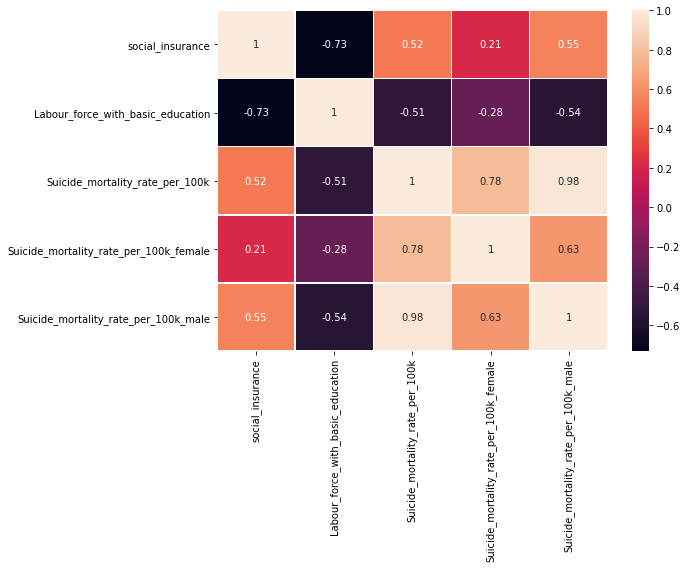

In [6]:
# Before we doing the ML we tried to see If there is any coorelation between factors on "Suicide_mortality_rate_per_100k" 
indicator_corr= pd.get_dummies(indicator_cleandata).corr()
indicator_corr_treatment= indicator_corr["Suicide_mortality_rate_per_100k"]

print("Display items with correlation coefficient of 0.3 or more and -0.3 or less")
# Get values with a correlation coefficient of 0.2 or more and -0.2 or less
target_cc_value = 0.4

print("Positive correlation")
display(indicator_corr_treatment[indicator_corr_treatment >= target_cc_value])
print("Negative correlation")
display(indicator_corr_treatment[indicator_corr_treatment <= (-1*target_cc_value)])

df_indexs = indicator_corr[(indicator_corr["Suicide_mortality_rate_per_100k"] >= target_cc_value) | (indicator_corr["Suicide_mortality_rate_per_100k"] <= (-1 * target_cc_value))].index

#print(indicator_corr)
df_cc_target=indicator_corr.loc[df_indexs,df_indexs]
plt.figure(figsize=(10, 8)) #heatmap size
sns.heatmap(df_cc_target, annot=True, linewidths=.5)
plt.savefig("static/images/corr.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

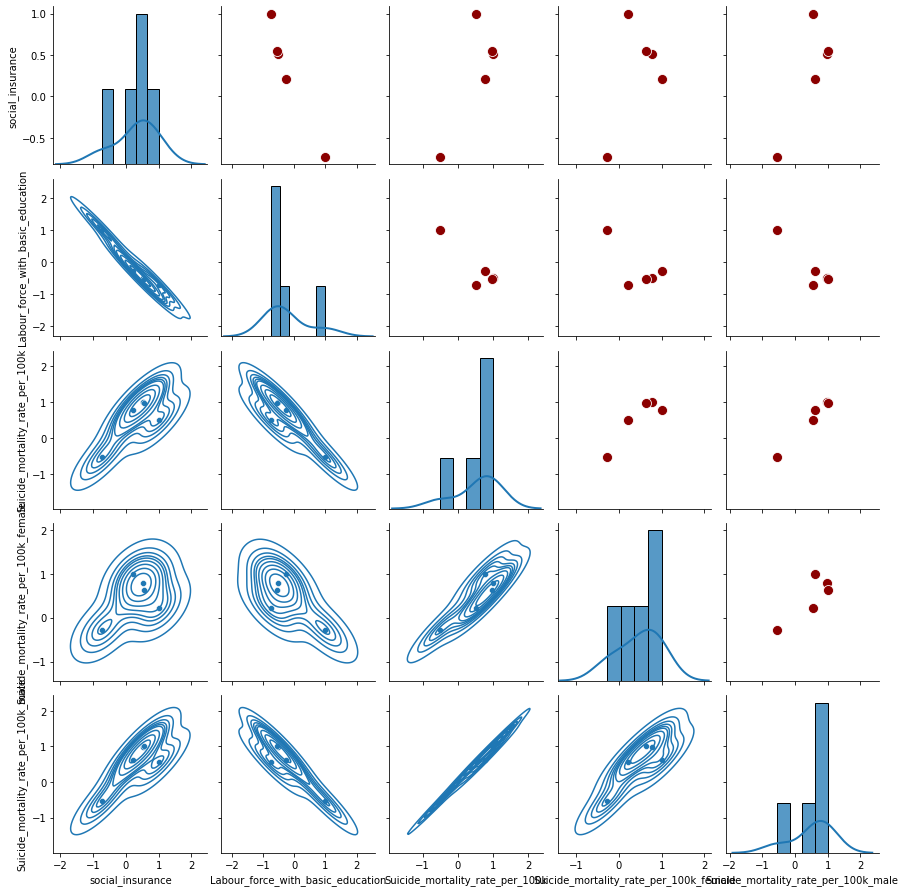

In [7]:
g = sns.pairplot(df_cc_target)
g.map_upper(sns.scatterplot, s=100,color = 'darkred')
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
plt.savefig("static/images/corrmatt.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

# 3. Machine Learning Analysis

In [116]:
# prepare the data
ready_data=indicator_cleandata.drop("Year",axis=1)
df = ready_data.groupby(['Country']).mean()
clean=df.dropna().reset_index()
clean.head()

Series Name,Country,social_insurance,social_protection,unemployment_benefits,Female_employment,Male_employment,Labor_force_rate_female,Labor_force_rate_male,Labor_force_total,Labour_force_with_basic_education,Labour_force_with_basic_education_female,life_expectancy_female,Life_expectancy_total,Total_population,Suicide_mortality_rate_per_100k,Suicide_mortality_rate_per_100k_female,Suicide_mortality_rate_per_100k_male,unemployment_with_basic_education_total,Unemployment_with_basic_education_female,Unemployment_with_basic_education_male
0,Albania,41.096936,61.306452,10.132416,40.581079,55.584757,42.191883,58.822420,50.342830,45.807854,38.922623,73.844085,71.563441,2.708297e+06,6.46,4.88,8.02,11.840331,10.500746,12.950308
1,Argentina,29.696534,42.901479,0.951552,39.046175,64.342229,40.683966,75.014531,57.172521,51.380139,35.616492,74.472983,71.031729,3.230120e+07,9.04,3.56,14.78,11.624067,13.626500,10.545540
2,Armenia,52.777384,65.270131,3.592037,39.940654,55.696192,49.857543,67.088551,57.659765,35.050225,26.788200,73.626424,70.604831,2.912377e+06,5.46,2.24,9.06,17.039125,13.007517,19.173558
3,Bangladesh,1.365637,24.248428,4.320003,36.217546,88.275061,30.461775,86.476388,59.068462,61.267900,36.667320,58.481915,58.323525,1.036261e+08,6.28,7.76,4.78,3.340320,5.426740,2.472680
4,Belize,28.189539,39.387019,5.721098,37.650920,73.936151,37.443678,73.280892,55.108950,58.037650,38.244650,71.126458,68.946746,2.076720e+05,4.96,1.82,8.16,9.716186,16.777500,6.184928


# 3A. Linear regression

In [120]:
y = clean["Suicide_mortality_rate_per_100k"].values.reshape(-1, 1)
data = clean.drop("Country",axis=1).drop("Suicide_mortality_rate_per_100k",axis=1).drop("Suicide_mortality_rate_per_100k_female",axis=1).drop("Suicide_mortality_rate_per_100k_male",axis=1).drop("Total_population",axis=1)
X=data.values
X_columns = data.iloc[:,1:].columns

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7025286422232244
Testing Score: -0.3568799829241276


Text(0.5, 1.0, 'Residual Plot')

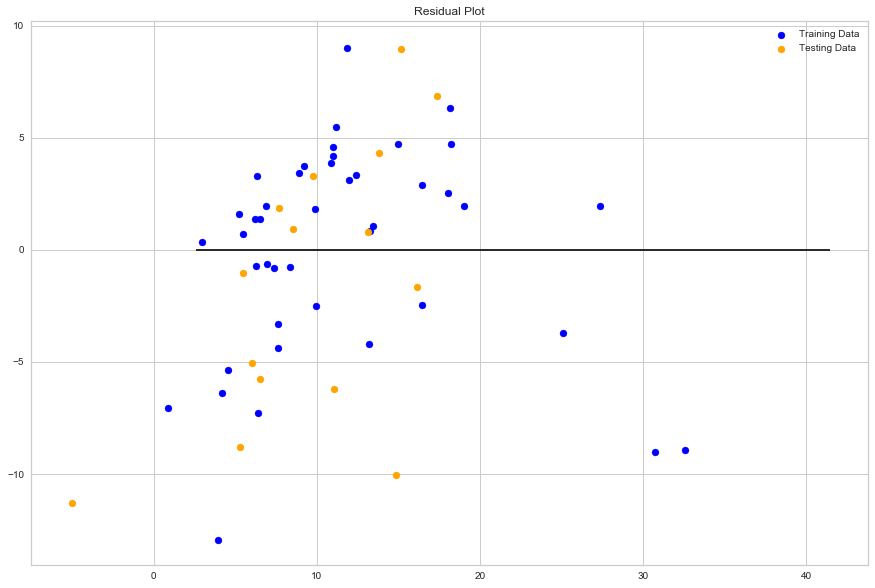

In [122]:
plt.figure(figsize=(15, 10))
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [123]:
predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 37.893265250272826, R2: -0.3568799829241276


# 3B. Logistic regression


# 3C. Decision Tree

# 3D. Random Forest

# 3E. Support Vector Machine (SVM)

# 3F. Natural Language Processing (NLP)

# 4. Conclusion